#ASSIGNMENT-4 
##Implementation of Random Search Cross Validation

## 1. Generating a Random Dataset

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60) #Generating 10,000 datapoints which will be classified into 2 classes, both of which are informative
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42) #Splitting the dataset into D-train and D-test


In [ ]:
#Checking then ratio in which the dataset D is split into D-train and D-test
print(len(X_train)) 
print(len(X_test))

7500
2500


In [ ]:
#Hence the raio is 3:1

##2. Plot of the Class Labels against both features

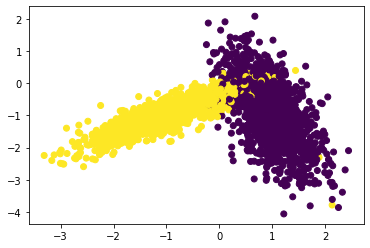

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# 3. Implementation of RandomSearch Cross Validation

### 3.1 Instructions

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to divide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.divide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can divide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

### 3.2 Implementation

In [ ]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):

    trainscores = [] #Accuracy scores of Training Data will be appended.

    cv_scores  = []  #Accuracy scores of Test Data (Unseen Data) will be appended.

    for k in tqdm(param_range['n_neighbors']): #iterating through randomly generated uniform k-values

        trainscores_folds = [] # Accuracy of Training Data
        cv_scores_folds  = [] #Accuracy of Cross-validation Data

        indices= round(len(x_train)/folds) #index values of Training Data for dividing into D-train and D-cross-validation. Rounded off to nearest integer as it cannot accept float values- Ex: 7500/3=2500 if folds=3
                                           #Here 7500 is divided into 3 parts of 2500 each. 2 parts will go to D-train and remaining 1 part to D-cv

        count=0 #initializing a variable called count for counting the number of indices

        for j in range(folds): #number of iterations = number of folds (k'-fold Cross validation), # check this out: https://stackoverflow.com/a/9755548/4084039
            cv_indices = list(range(count,count+indices))
            train_indices = list(set(list(range(1, len(x_train)))) - set(cv_indices))

            # selecting the data points based on the train_indices and cv_indices
            X_train = x_train[train_indices] #Selecting the index values for X_train from original x_train 
            Y_train = y_train[train_indices] #Selecting the index values for Y_train from original y_train 
            X_cv  = x_train[cv_indices] #Selecting the index values for X_cv from original x_train
            Y_cv  = y_train[cv_indices] #Selecting the index values for Y_cv from original y_train

            classifier.n_neighbors = k #for value of k (KNN) in param_range
            classifier.fit(X_train,Y_train) # Learning from D-train
            Y_predicted = classifier.predict(X_train) #Prediction of class_label done on D-train using each X_train
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted)) #training accuracy scores appended to trainscores_folds list

            Y_predicted = classifier.predict(X_cv) #Prediction of class_label done on D-cv using each X_cv
            cv_scores_folds.append(accuracy_score(Y_cv, Y_predicted)) #Accuracy scores predicted on D-cv appended to cv_scores_folds list

            count+=indices #count incremented from 0 to 0+length of each fold 

        trainscores.append(np.mean(np.array(trainscores_folds))) #average training accuracy score for each value of K appended to trainscores list
        cv_scores.append(np.mean(np.array(cv_scores_folds))) #average cross-validation accuracy score for each value of K appended to trainscores list

    return trainscores,cv_scores #returns list of average train and test scores for Each value of K.


{'n_neighbors': [4, 5, 7, 11, 12, 16, 17, 21, 25, 26]}


100%|██████████| 10/10 [00:22<00:00,  2.30s/it]


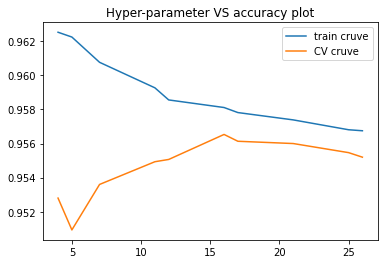

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

neigh = KNeighborsClassifier() #Here we use KNN as the classifier

param_range = {'n_neighbors':sorted(random.sample(range(1,30),10))} #Generating random sample of K-values of KNN in range 1 to any number and sorting it in ascending order
print(param_range)
folds = 10 #selecting number of folds (any integer)

trainscores,cv_scores = RandomSearchCV(X_train, y_train, neigh, param_range, folds)
 
#Plotting the k-value(Hyper Parameter) v/s accuracy plot
plt.plot(param_range['n_neighbors'],trainscores, label='train cruve')
plt.plot(param_range['n_neighbors'],cv_scores, label='CV cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

Best Value of K= One which has highest value of Cross Validation Accuracy and the region where the gap between the Train curve and CV curve is the least.
Here we see from the plot that the **Best value of K= 16** for the generated random sample of KNN and **10 Fold Cross Validation**.
**Highest CV Accuracy= 95.7%**

# 4. Plotting Decision Surface

In [ ]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

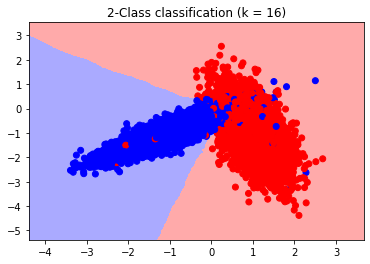

In [ ]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 16) #Choosing Best K-value from above
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

#5. Conclusion


*  The Decision surface has been plotted for **K=16** and **10 Fold Cross Validation**.
*   It clearly separates one class from another with very few outliers. The Highest Cross Validation Accuracy= **95.7%**.


 

